In [ ]:
print(df)

                name player style   nationality  base price (in lacs)  \
0       Harshit Rana       Bowler         India                   NaN   
1          Ekant Sen       Batter         India                  20.0   
2      Wayne Parnell   Allrounder  South Africa                  75.0   
3    Shakib Al Hasan   Allrounder    Bangladesh                 150.0   
4           Joe Root       Batter       England                 100.0   
..               ...          ...           ...                   ...   
304         MS Dhoni    WK-Batter         India                   NaN   
305        Moeen Ali   Allrounder       England                   NaN   
306  Ruturaj Gaikwad       Batter         India                   NaN   
307     Rishabh Pant    WK-Batter         India                   NaN   
308       Axar Patel   Allrounder         India                   NaN   

     final price (in lacs) franchise    status  
0                     20.0       KKR  RETAINED  
1                      Na

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
path="/content/drive/MyDrive/ipl.csv"
df=pd.read_csv(path)

In [ ]:
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [12]:
df_new = df[df["final price (in lacs)"].isna() == False]
df_new.reset_index(inplace = True, drop = "index")

In [ ]:
df["nationality"].value_counts()

India           201
England          24
South Africa     19
West Indies      14
Australia        14
New Zealand      11
Sri Lanka         8
Afghanistan       7
Bangladesh        4
Ireland           2
Zimbabwe          2
Namibia           1
Netherlands       1
Singapore         1
Name: nationality, dtype: int64

In [ ]:
df_new = df[df["final price (in lacs)"].isna() == False]
df_new.reset_index(inplace = True, drop = "index")

df_new.groupby(["nationality"])["final price (in lacs)"].describe()

,count,mean,std,min,25%,50%,75%,max
nationality,,,,,,,,
Afghanistan,4.0,407.500000,728.394353,30.0,45.00,50.0,412.50,1500.0
Australia,11.0,591.818182,528.560653,75.0,150.00,625.0,847.50,1750.0
Bangladesh,3.0,133.333333,76.376262,50.0,100.00,150.0,175.00,200.0
England,15.0,745.666667,558.543599,100.0,200.00,750.0,1075.00,1850.0
India,162.0,323.456790,430.653585,20.0,20.00,62.5,525.00,1700.0
Ireland,1.0,440.000000,NaN,440.0,440.00,440.0,440.00,440.0
Namibia,1.0,100.000000,NaN,100.0,100.00,100.0,100.00,100.0
New Zealand,8.0,221.250000,237.813703,80.0,100.00,150.0,192.50,800.0
Singapore,1.0,825.000000,NaN,825.0,825.00,825.0,825.00,825.0


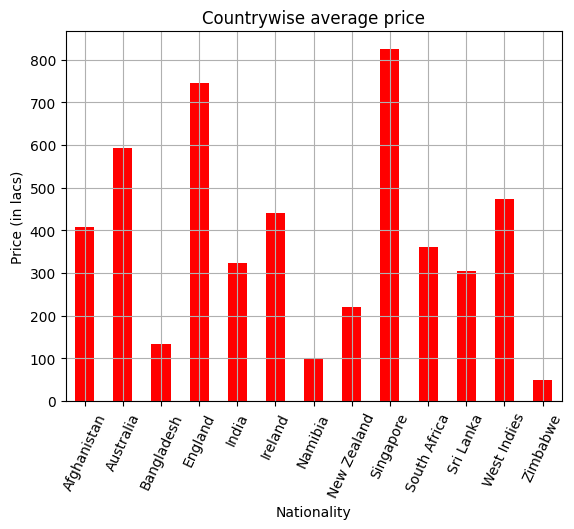

In [ ]:
ser_mean = df_new.groupby("nationality")["final price (in lacs)"].mean()

ser_mean.plot(kind = "bar", grid = True, color = "red", rot = 65)
plt.xlabel("Nationality")
plt.ylabel("Price (in lacs)")
plt.title("Countrywise average price")
plt.show()


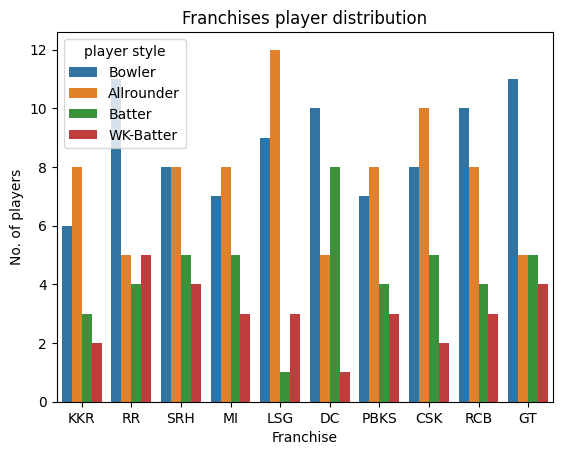

In [ ]:
sns.countplot(data = df_new, x = "franchise", hue = "player style")
plt.xlabel("Franchise")
plt.ylabel("No. of players")
plt.title("Franchises player distribution")
plt.show()

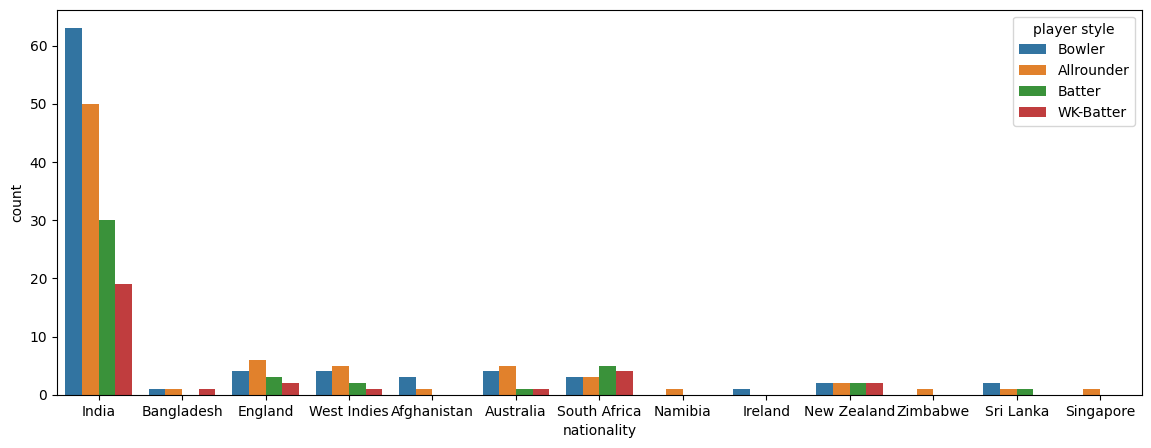

In [ ]:
plt.figure(figsize = (14, 5))
sns.countplot(x = "nationality", hue = "player style", data = df_new, orient = "v")
plt.show()

In [8]:
df_sold = df[df["status"] == "SOLD"]
df_sold.reset_index(drop = "index", inplace = True)
df_sold.head()


,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
1,Joe Root,Batter,England,100.0,100.0,RR,SOLD
2,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
3,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
4,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD


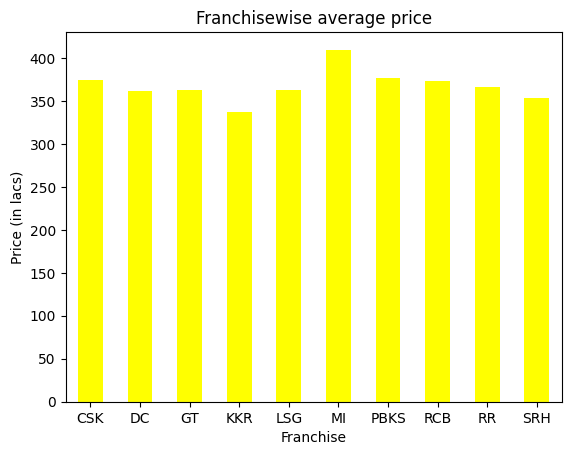

In [13]:
df_new.groupby("franchise")["final price (in lacs)"].sum()
ser_fran_mean = df_new.groupby("franchise")["final price (in lacs)"].mean()
ser_fran_mean
ser_fran_mean.plot(kind = "bar", color = "yellow", rot = 0)
plt.xlabel("Franchise")
plt.ylabel("Price (in lacs)")
plt.title("Franchisewise average price")
plt.show()

In [14]:
df_sold = df[df["status"] == "SOLD"]
df_sold.reset_index(drop = "index", inplace = True)
df_sold.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
1,Joe Root,Batter,England,100.0,100.0,RR,SOLD
2,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
3,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
4,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD


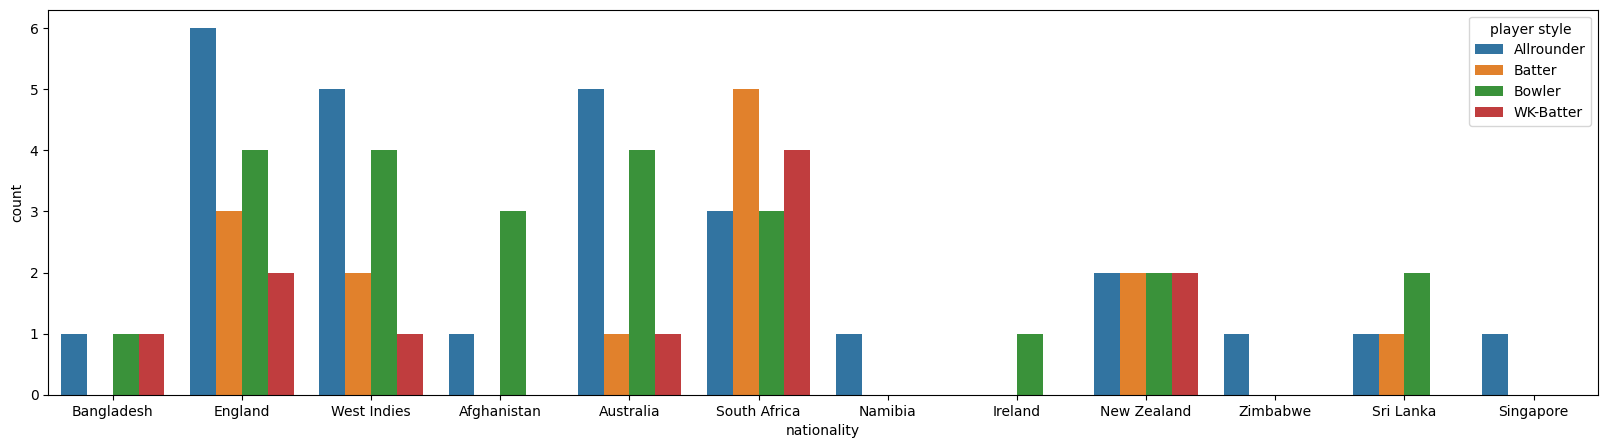

In [15]:
plt.figure(figsize = (20, 5))
sns.countplot(x = "nationality", hue = "player style", data = df_new[df_new["nationality"] != "India"], orient = "v")
plt.show()

In [19]:
prominent_nations = ["India", "England", "West Indies", "Australia", "South Africa", "New Zealand"]
df_prom = df_new[df_new["nationality"].apply(lambda nation: nation in prominent_nations)]
df_prom.reset_index(drop = "index", inplace = True)
df_prom.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Joe Root,Batter,England,100.0,100.0,RR,SOLD
2,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
3,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
4,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD


In [22]:
explode = []
for nation in range(len(prominent_nations)):
    explode.append(0.05)
explode = tuple(explode)
ser = df_prom.groupby(["nationality"])["final price (in lacs)"].sum()
ser

nationality
Australia        6510.0
England         11185.0
India           52400.0
New Zealand      1770.0
South Africa     5405.0
West Indies      5670.0
Name: final price (in lacs), dtype: float64

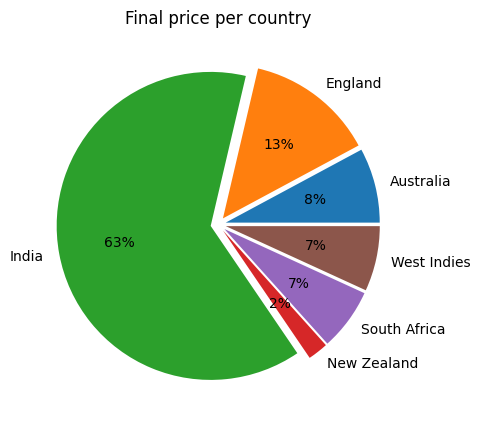

In [23]:
plt.figure(figsize = (5, 5))
ser.plot(kind = "pie", autopct = '%1.0f%%', explode = explode, title = "Final price per country")
plt.ylabel(None)
plt.show()

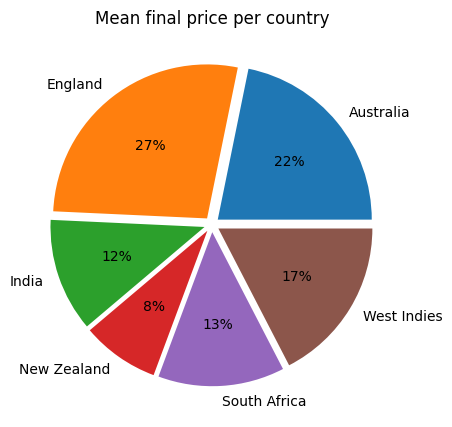

In [24]:
ser_mean = df_prom.groupby(["nationality"])["final price (in lacs)"].mean()
ser_mean
plt.figure(figsize = (5, 5))
ser_mean.plot(kind = "pie", autopct = '%1.0f%%', explode = explode, title = "Mean final price per country")
plt.ylabel(None)
plt.show()

In [25]:
df_prom_retained = df_prom[df_prom["status"] == "RETAINED"]
df_prom_retained.reset_index(drop = "index", inplace = True)
df_prom_retained.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Rajat Patidar,Batter,India,NaN,20.0,RCB,RETAINED
2,Tristan Stubbs,WK-Batter,South Africa,NaN,20.0,MI,RETAINED
3,Ravi Bishnoi,Bowler,India,NaN,400.0,LSG,RETAINED
4,Yash Dhull,Batter,India,NaN,50.0,DC,RETAINED


In [26]:
df_prom_retained["nationality"].value_counts()

nationality
India           111
South Africa     11
West Indies       7
England           7
Australia         7
New Zealand       6
Name: count, dtype: int64

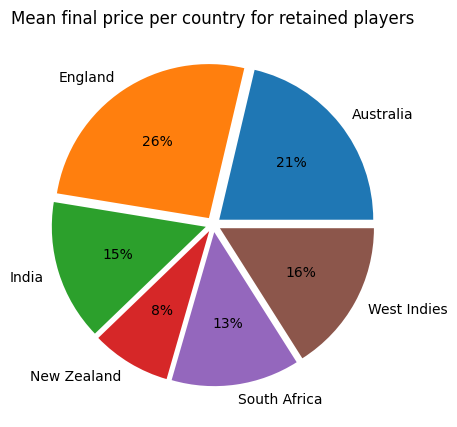

In [28]:
ser_prom_retained_mean = df_prom_retained.groupby("nationality")["final price (in lacs)"].mean()
ser_prom_retained_mean
plt.figure(figsize = (5, 5))
ser_prom_retained_mean.plot(kind = "pie", autopct = '%1.0f%%', explode = explode, title = "Mean final price per country for retained players")
plt.ylabel(None)
plt.show()

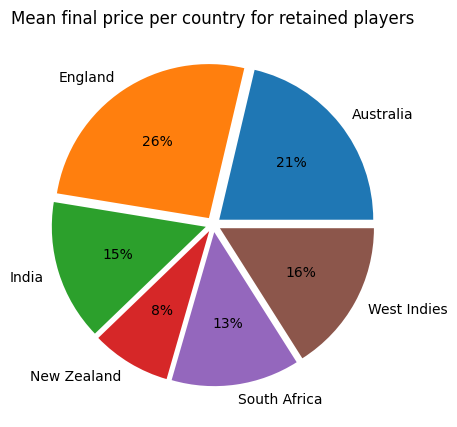

In [29]:
plt.figure(figsize = (5, 5))
ser_prom_retained_mean.plot(kind = "pie", autopct = '%1.0f%%', explode = explode, title = "Mean final price per country for retained players")
plt.ylabel(None)
plt.show()

<ipython-input-30-88ca58479405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prom["overseas"] = (df_prom["nationality"] != "India")


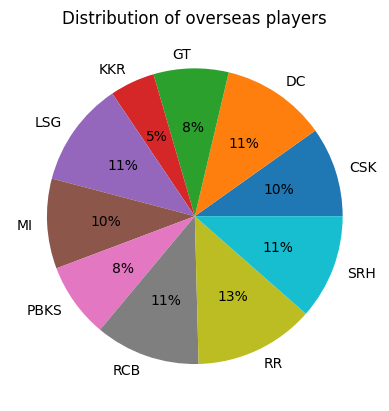

In [30]:
df_prom["overseas"] = (df_prom["nationality"] != "India")
df_prom.head()
df_prom.groupby("franchise")["overseas"].sum().plot(kind = "pie", autopct = '%1.0f%%', title = "Distribution of overseas players")
plt.ylabel(None)
plt.show()

In [32]:
df_prom[df_prom["overseas"] == False]["final price (in lacs)"].mean()

323.4567901234568

In [34]:
df_prom[df_prom["overseas"] == True]["final price (in lacs)"].mean()

500.655737704918

In [35]:
pd.crosstab(df_prom["status"], df_prom["nationality"], normalize = "columns")

nationality,Australia,England,India,New Zealand,South Africa,West Indies
status,,,,,,
RETAINED,0.636364,0.466667,0.685185,0.75,0.733333,0.583333
SOLD,0.363636,0.533333,0.314815,0.25,0.266667,0.416667


In [38]:
pd.crosstab(df["status"], df["nationality"], normalize = "index")

nationality,Afghanistan,Australia,Bangladesh,England,India,Ireland,Namibia,Netherlands,New Zealand,Singapore,South Africa,Sri Lanka,West Indies,Zimbabwe
status,,,,,,,,,,,,,,
RETAINED,0.018987,0.044304,0.006329,0.044304,0.702532,0.000000,0.0000,0.000000,0.037975,0.006329,0.069620,0.025316,0.044304,0.000000
SOLD,0.012500,0.050000,0.025000,0.100000,0.637500,0.012500,0.0125,0.000000,0.025000,0.000000,0.050000,0.000000,0.062500,0.012500
UNSOLD,0.042254,0.042254,0.014085,0.126761,0.549296,0.014085,0.0000,0.014085,0.042254,0.000000,0.056338,0.056338,0.028169,0.014085


In [39]:

pd.crosstab(df["status"], df[df["nationality"] != "India"]["nationality"], normalize = "index")

nationality,Afghanistan,Australia,Bangladesh,England,Ireland,Namibia,Netherlands,New Zealand,Singapore,South Africa,Sri Lanka,West Indies,Zimbabwe
status,,,,,,,,,,,,,
RETAINED,0.063830,0.148936,0.021277,0.148936,0.000000,0.000000,0.00000,0.127660,0.021277,0.234043,0.085106,0.148936,0.000000
SOLD,0.034483,0.137931,0.068966,0.275862,0.034483,0.034483,0.00000,0.068966,0.000000,0.137931,0.000000,0.172414,0.034483
UNSOLD,0.093750,0.093750,0.031250,0.281250,0.031250,0.000000,0.03125,0.093750,0.000000,0.125000,0.125000,0.062500,0.031250
